<h2 style='color:purple' align='center'>MLRM</h2>

<p><b>We have a dataset containing prices of used BMW cars. We are going to analyze this dataset
and build a prediction function that can predict a price by taking mileage and age of the car
as input. We will use sklearn train_test_split method to split training and testing dataset</b></p>

In [2]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/sravanirachamalla/MLA2021/main/carprices.csv")
df.head()

,Mileage,Age(yrs),Sell Price($)
0,69000,6,18000
1,35000,3,34000
2,57000,5,26100
3,22500,2,40000
4,46000,4,31500


In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

**Car Mileage Vs Sell Price ($)**

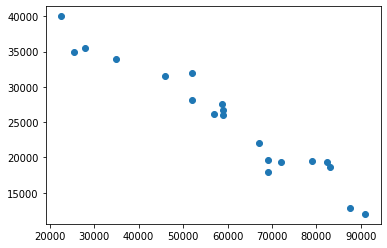

In [4]:
plt.scatter(df['Mileage'],df['Sell Price($)'])

**Car Age Vs Sell Price ($)**

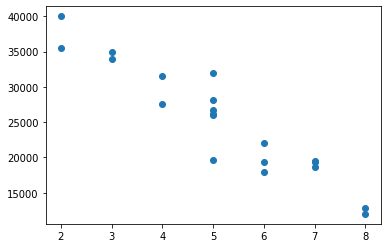

In [5]:
plt.scatter(df['Age(yrs)'],df['Sell Price($)'])

**Looking at above two scatter plots, using linear regression model makes sense as we can clearly see a linear relationship between our dependant (i.e. Sell Price) and independant variables (i.e. car age and car mileage)**

<p style='color:purple'><b>The approach we are going to use here is to split available data in two sets</b></p>
    <ol>
        <b>
        <li>Training: We will train our model on this dataset</li>
        <li>Testing: We will use this subset to make actual predictions using trained model</li>
        </b>
     </ol>
<p style='color:purple'><b>The reason we don't use same training set for testing is because our model has seen those samples before, using same samples for making predictions might give us wrong impression about accuracy of our model. It is like you ask same questions in exam paper as you tought the students in the class.
</b></p>

In [6]:
X = df[['Mileage','Age(yrs)']]

In [7]:
y = df['Sell Price($)']

In [9]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

X = sm.add_constant( df[['Mileage','Age(yrs)']] )
Y = df['Sell Price($)']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,
                                                  random_state=10) 

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [10]:
X_train

,const,Mileage,Age(yrs)
13,1.0,58780,4
2,1.0,57000,5
14,1.0,82450,7
8,1.0,91000,8
17,1.0,69000,5
16,1.0,28000,2
19,1.0,52000,5
12,1.0,59000,5
11,1.0,79000,7
1,1.0,35000,3


In [11]:
X_test

,const,Mileage,Age(yrs)
7,1.0,72000,6
10,1.0,83000,7
5,1.0,59000,5
6,1.0,52000,5
3,1.0,22500,2
18,1.0,87600,8


In [12]:
y_train

13    27500
2     26100
14    19400
8     12000
17    19700
16    35500
19    28200
12    26000
11    19500
1     34000
0     18000
15    35000
4     31500
9     22000
Name: Sell Price($), dtype: int64

In [13]:
y_test

7     19300
10    18700
5     26750
6     32000
3     40000
18    12800
Name: Sell Price($), dtype: int64

**Lets run linear regression model now**

In [14]:
from sklearn.linear_model import LinearRegression
clf = LinearRegression()
clf.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [15]:
model_1 = sm.OLS(y_train, X_train).fit()
model_1.summary2()

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary2.Summary'>
"""
                  Results: Ordinary least squares
===================================================================
Model:              OLS              Adj. R-squared:     0.927     
Dependent Variable: Sell Price($)    AIC:                254.2108  
Date:               2021-08-24 06:08 BIC:                256.1280  
No. Observations:   14               Log-Likelihood:     -124.11   
Df Model:           2                F-statistic:        83.92     
Df Residuals:       11               Prob (F-statistic): 2.18e-07  
R-squared:          0.938            Scale:              3.7327e+06
-------------------------------------------------------------------
            Coef.     Std.Err.    t    P>|t|    [0.025     0.975]  
-------------------------------------------------------------------
const     45862.0814 1672.0736 27.4283 0.0000 42181.8721 49542.2907
Mileage      -0.2927    0.0933 -3.1364 0.0095    -0.4982    -0.0873
Age(yrs)   -686.1550 1083.5842 -0.6332 0.5395 -3071.1078  1698.7978
-------------------------------------------------------------------
Omnibus:              1.177         Durbin-Watson:           1.640 
Prob(Omnibus):        0.555         Jarque-Bera (JB):        0.980 
Skew:                 -0.542        Prob(JB):                0.613 
Kurtosis:             2.288         Condition No.:           200175
===================================================================
* The condition number is large (2e+05). This might indicate
strong multicollinearity or other numerical problems.
"""

**price= 45862.0814-0.2927(mileage)-686.1550(age)**

In [16]:
clf.predict(X_test)

array([20668.52722622, 16762.33242213, 25160.18381011, 27209.30003936,
       37903.32633702, 14729.61531335])

In [17]:
y_test

7     19300
10    18700
5     26750
6     32000
3     40000
18    12800
Name: Sell Price($), dtype: int64

In [18]:
clf.score(X_test, y_test)

0.9212422483776327

**random_state argument**

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=10)
X_test

,const,Mileage,Age(yrs)
7,1.0,72000,6
10,1.0,83000,7
5,1.0,59000,5
6,1.0,52000,5
3,1.0,22500,2
18,1.0,87600,8


P-P Plot

<Figure size 576x432 with 0 Axes>

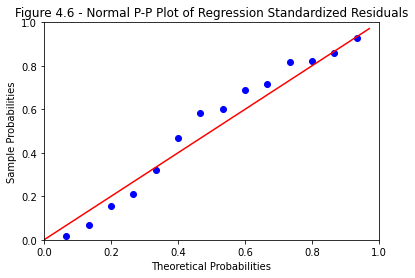

In [20]:
def draw_pp_plot( model, title ):
  probplot = sm.ProbPlot( model.resid );
  plt.figure( figsize = (8, 6) );
  probplot.ppplot( line='45' );
  plt.title( title );
  plt.show();
draw_pp_plot( model_1,
            "Figure 4.6 - Normal P-P Plot of Regression Standardized Residuals"
);

 Residual Plot